In [17]:
# 중국인 관광객 변화 추이
import pandas as pd

df = pd.read_excel('한국관광데이터/kto_201001.xlsx', header = 1, usecols ='A:G', skipfooter=4)
df

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,329131,18238,421,4339,80916,433045
1,일본,202825,1750,89,549,3971,209184
2,대만,35788,41,17,37,516,36399
3,홍콩,13874,55,0,21,595,14545
4,마카오,554,0,0,0,0,554
...,...,...,...,...,...,...,...
62,아프리카 기타,349,594,25,86,296,1350
63,기타대륙,10,3,0,0,0,13
64,국적미상,10,3,0,0,0,13
65,교포소계,0,0,0,0,22537,22537


In [67]:
from tqdm import tqdm  # for문의 진행상황을 알려주는 도구
total = []
for y in tqdm(range(2010, 2021)):
    for m in range(1, 13):
        year = y
        month = str(m).zfill(2)
        if year == 2020 and m == 6:
            break
        df = pd.read_excel(f'한국관광데이터/kto_{year}{month}.xlsx', header = 1, usecols ='A:G', skipfooter = 4)
        df['MONTH'] = month
        df['YEAR'] = year
        df['DATE'] = f'{y}-{m}'
        total.append(df)

100%|███████████████████████████████████████████| 11/11 [00:01<00:00,  8.81it/s]


In [33]:
len(total)

125

In [73]:
import koreanize_matplotlib

df = pd.concat(total, ignore_index=True)
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.set_index('DATE')

china = df[df['국적'] == '중국']
china

,국적,관광,상용,공용,유학/연수,기타,계,MONTH,YEAR
DATE,,,,,,,,,
2010-01-01,중국,40425,11930,55,2751,36091,91252,01,2010
2010-02-01,중국,60590,7907,68,29546,42460,140571,02,2010
2010-03-01,중국,50330,13549,174,14924,62480,141457,03,2010
2010-04-01,중국,84252,13306,212,2199,47711,147680,04,2010
2010-05-01,중국,89056,12325,360,2931,49394,154066,05,2010
...,...,...,...,...,...,...,...,...,...
2020-01-01,중국,393336,2813,99,10433,75000,481681,01,2020
2020-02-01,중국,49520,715,11,20753,33087,104086,02,2020
2020-03-01,중국,5040,115,2,7388,4050,16595,03,2020


<Axes: xlabel='DATE'>

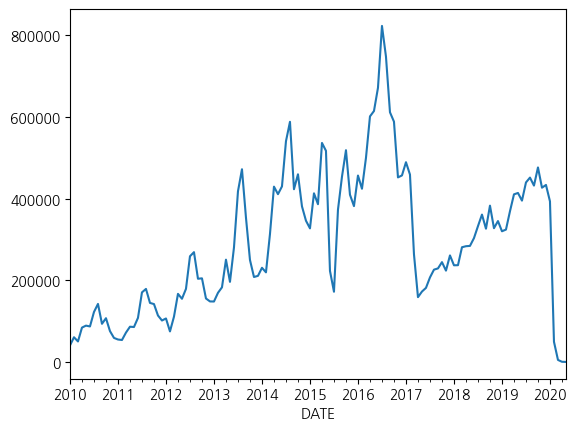

In [75]:
china['관광'].plot()

<Axes: xlabel='MONTH', ylabel='YEAR'>

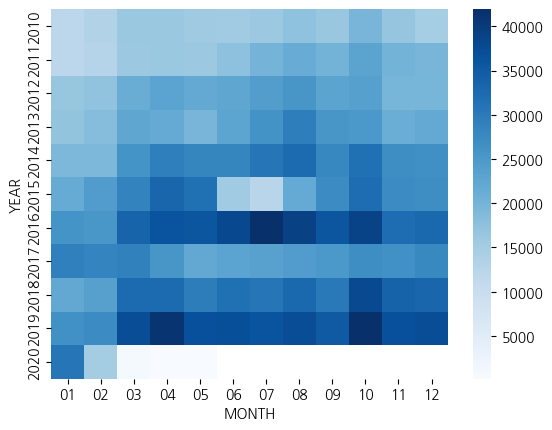

In [85]:
import seaborn as sns

table = df.pivot_table(index = 'YEAR', columns='MONTH', values='관광')
table

sns.heatmap(table, cmap = 'Blues')


In [ ]:
import pickle

#### 전화번호 관리 프로그램
# 퀴즈: 전화번호를 입력하면 삭제해주는 기능 만들기.
f = open("phone.dat", 'rb')
phone_box = pickle.load(f)
f.close()

def del_numbers():
    numbers = input("입력: ")
    for idx, i in enumerate(phone_box):
        if numbers == i[1]:
            del phone_box[idx]
            f = open("phone.dat", "wb")
            pickle.dump(phone_box, f)
            f.close()

def show_info():
    for name, phone in phone_box:
        print(f"{phone}, {name}")

def add_numbers():
    name = input("이름: ")
    number = input("번호: ")
    A = [name, number]
    if A not in phone_box:
        phone_box.append(A)
        print("전화번호 저장 완료!")
        f = open("phone.dat", "wb")
        pickle.dump(phone_box, f)
        f.close()

while True:
    print("""전화번호 관리 프로그램
    
    1. 전화번호 입력
    2. 전화번호 조회
    3. 전화번호 삭제
    4. 종료""")

    n = int(input("입력: "))
    if n == 1:
        add_numbers()
    elif n == 2:
        show_info()
    elif n == 3:
        del_numbers()
    elif n == 4:
        break

    print()

전화번호 관리 프로그램
    
    1. 전화번호 입력
    2. 전화번호 조회
    3. 전화번호 삭제
    4. 종료


입력:  2


1, 장원영 12341234
0104514675, 이민혁
123123213, 이민혁2
2313, 이민혁

전화번호 관리 프로그램
    
    1. 전화번호 입력
    2. 전화번호 조회
    3. 전화번호 삭제
    4. 종료


입력:  3
입력:  1



전화번호 관리 프로그램
    
    1. 전화번호 입력
    2. 전화번호 조회
    3. 전화번호 삭제
    4. 종료


입력:  3
입력:  1



전화번호 관리 프로그램
    
    1. 전화번호 입력
    2. 전화번호 조회
    3. 전화번호 삭제
    4. 종료


입력:  2


0104514675, 이민혁
123123213, 이민혁2
2313, 이민혁

전화번호 관리 프로그램
    
    1. 전화번호 입력
    2. 전화번호 조회
    3. 전화번호 삭제
    4. 종료


입력:  3
입력:  0104514675



전화번호 관리 프로그램
    
    1. 전화번호 입력
    2. 전화번호 조회
    3. 전화번호 삭제
    4. 종료


입력:  1
이름:  하이
번호:  123


전화번호 저장 완료!

전화번호 관리 프로그램
    
    1. 전화번호 입력
    2. 전화번호 조회
    3. 전화번호 삭제
    4. 종료


입력:  2


123123213, 이민혁2
2313, 이민혁
123, 하이

전화번호 관리 프로그램
    
    1. 전화번호 입력
    2. 전화번호 조회
    3. 전화번호 삭제
    4. 종료


입력:  2


123123213, 이민혁2
2313, 이민혁
123, 하이

전화번호 관리 프로그램
    
    1. 전화번호 입력
    2. 전화번호 조회
    3. 전화번호 삭제
    4. 종료


In [7]:
phone_box

[]